In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# NLTK for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [4]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Load dataset
df = pd.read_csv("Reviews.csv")

In [6]:
df.shape

(568454, 10)

In [7]:
# Display the first few rows
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# Drop missing values and duplicates
df.dropna(subset=['Text', 'Score'], inplace=True)
df.drop_duplicates(subset=['Text'], inplace=True)

In [9]:
# Only keep reviews with Score 1 (negative) or Score 5 (positive)
df = df[df['Score'].isin([1, 5])]

In [10]:
# Convert 'Score' to binary labels: 1 for positive, 0 for negative
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x == 5 else 0)

In [11]:
# Function to clean and preprocess text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [12]:
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)
    
    # Tokenize, remove stopwords, and lemmatize
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)


In [13]:
# Apply preprocessing to the review text
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)
df[['Text', 'Cleaned_Text', 'Sentiment']].head()


,Text,Cleaned_Text,Sentiment
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,1
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanut pe...,0
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,1
6,This saltwater taffy had great flavors and was...,saltwater taffy great flavor soft chewy candy ...,1
7,This taffy is so good. It is very soft and ch...,taffy good soft chewy flavor amazing would def...,1


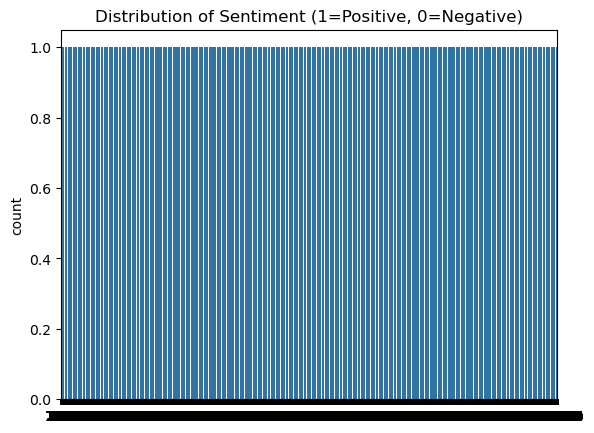

In [14]:
# Distribution of sentiment
sns.countplot(df['Sentiment'])
plt.title('Distribution of Sentiment (1=Positive, 0=Negative)')
plt.show()

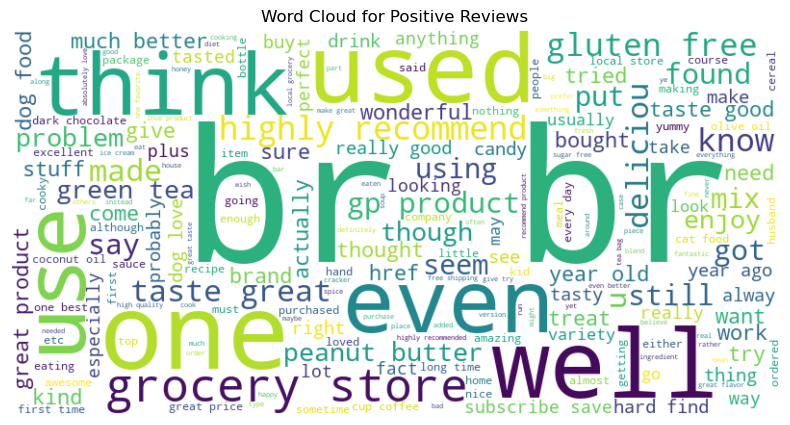

In [15]:
# Word cloud for positive reviews
positive_reviews = df[df['Sentiment'] == 1]['Cleaned_Text'].str.cat(sep=' ')
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [16]:
from wordcloud import STOPWORDS

In [17]:
# Check for missing values and filter out empty reviews
df = df[df['Cleaned_Text'].notna()]

In [18]:
# Reduce the number of negative reviews to a manageable size
negative_reviews = df[df['Sentiment'] == 0]['Cleaned_Text'].sample(5000).str.cat(sep=' ')

In [19]:
# Create a word cloud with a limit on max_words
wordcloud_neg = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    max_words=200,  # Limit the number of words
    stopwords=STOPWORDS  # Add default stopwords
).generate(negative_reviews)

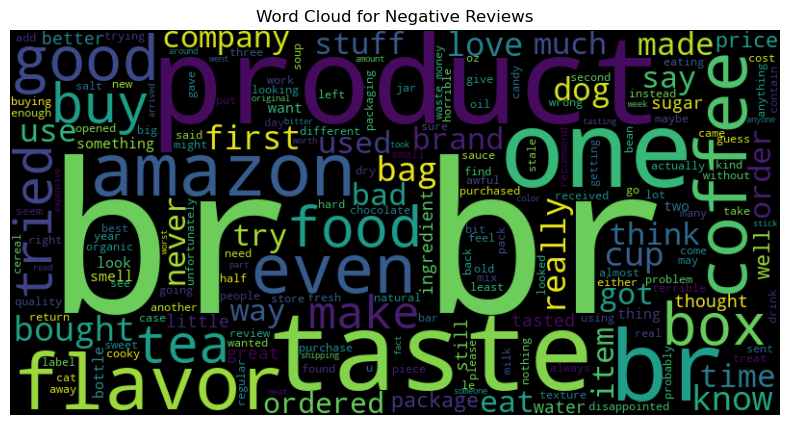

In [20]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [21]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Text'], df['Sentiment'], test_size=0.2, random_state=42)

In [22]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [23]:
# Transform the training and test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [24]:
# Initialize Logistic Regression model
model = LogisticRegression()

In [25]:
# Train the model
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [27]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 94.90%


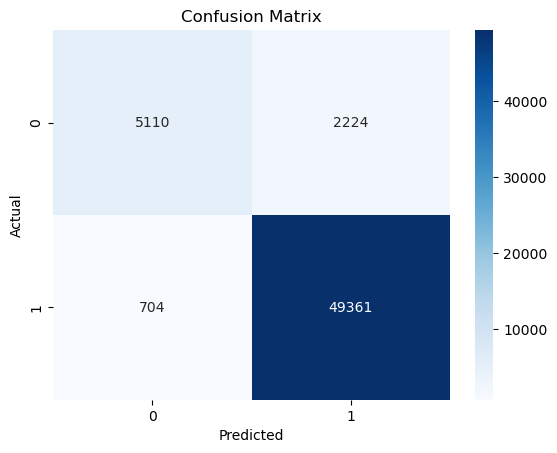

In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7334
           1       0.96      0.99      0.97     50065

    accuracy                           0.95     57399
   macro avg       0.92      0.84      0.87     57399
weighted avg       0.95      0.95      0.95     57399



In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Set parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [32]:
# Initialize Grid Search with Logistic Regression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

In [33]:
# Fit the model
grid.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [34]:
# Best parameters
print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'C': 10}


In [35]:
from sklearn.model_selection import GridSearchCV

# Set parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize Grid Search with Logistic Regression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X_train_tfidf, y_train)

# Best parameters
print(f"Best Parameters: {grid.best_params_}")


Best Parameters: {'C': 10}
